# **Processamento de Linguagem Natural [2025-Q3]**
Prof. Alexandre Donizeti Alves

### **PROJETO PRÁTICO** [LangChain + Grandes Modelos de Linguagem]


O **PROJETO PRÁTICO** deve ser feito utilizando o **Google Colab** com uma conta sua vinculada ao Gmail. O link do seu notebook armazenado no Google Drive e o link de um repositório no GitHub devem ser enviados usando o seguinte formulário:

> https://forms.gle/D4gLqP1iGgyn2hbH8


**IMPORTANTE**: A submissão deve ser feita até o dia **07/12 (domingo)** APENAS POR UM INTEGRANTE DA EQUIPE, até às 23h59. Por favor, lembre-se de dar permissão de ACESSO IRRESTRITO para o professor da disciplina.

### **EQUIPE**

---

**POR FAVOR, PREENCHER OS INTEGRANDES DA SUA EQUIPE:**


**Integrante 01:**

`Bruno Henrrico Ancelani RA: 11202020477`

**Integrante 02:**

`Gustavo Breno Nunes Godinho RA: 11202130028`

### **GRANDE MODELO DE LINGUAGEM (*Large Language Model - LLM*)**

---

Cada equipe deve selecionar um Grande Modelo de Linguagem (*Large Language Model - LMM*).



Por favor, informe os dados do LLM selecionada:

>


**LLM**: GPT-4o mini (OpenAI)

>

**Link para a documentação oficial**: https://platform.openai.com/docs/overview




### **API (Opcional)**
---

Por favor, informe os dados da API selecionada:

**API**: Dados utilizados nesse projeto foram de tweets coletados no ano de 2020 pela API do Twitter.

### **DESCRIÇÃO**
---

Implementar um `notebook` no `Google Colab` que faça uso do framework **`LangChain`** (obrigatório) e de um **LLM** aplicando, no mínimo, DUAS técnicas de PLN. As técnicas podem ser aplicada em qualquer córpus obtido a partir de uma **API** ou a partir de uma página Web.

O **LLM** e a **API** selecionados devem ser informados na seguinte planilha:

> https://docs.google.com/spreadsheets/d/1iIUZcwnywO7RuF6VEJ8Rx9NDT1cwteyvsnkhYr0NWtU/edit?usp=sharing

>
As seguintes técnicas de PLN podem ser usadas:

*   Detecção de Emoções
*   Extração de Palavras-chave
*   Tradução de Textos
*   Reconhecimento de Entidades Nomeadas
>

**IMPORTANTE:** É obrigatório usar o e-mail da UFABC.


### **CRITÉRIOS DE AVALIAÇÃO**
---


Serão considerados como critérios de avaliação os seguintes pontos:

* Uso do framework **`LangChain`**.

* Escolha e uso de um **LLM**.

* Escolha e uso de uma **API** ou **Página Web**.

* Projeto disponível no Github.

* Apresentação (5 a 10 minutos).

* Criatividade no uso do framework **`LangChain`** em conjunto com o **LLM** e a **API**.




**IMPORTANTE**: todo o código do notebook deve ser executado. Código sem execução não será considerado.

# Projeto: Moderação de Mensagens em Redes Sociais

## 🎯 Motivação
A necessidade de **moderação de mensagens em redes sociais** foi o ponto de partida deste projeto. O objetivo central é compreender e aprimorar mecanismos capazes de identificar conteúdos tóxicos e hostis.

## 🛠 Ferramentas Comparadas
Para isso, realizamos uma análise comparativa entre duas soluções:

- **Google Perspective API**  
  - Especializada em identificar **toxicidade em textos**.  
- **OpenAI Omni-Moderation Middleware**  
  - Middleware de moderação que oferece **detecção avançada de conteúdo problemático**.

## 🔍 Etapas da Pesquisa
1. **Comparação inicial**  
   - Avaliamos como o **Omni-Moderation** detecta textos já classificados como hostis pela **Perspective API**.  

2. **Integração com LLM**  
   - Em seguida, utilizamos um modelo que combina:  
     - A detecção do middleware.  
     - Uma análise adicional por meio de **LLM (GPT-4o mini)**.  

## 🚀 Conclusão
Esse processo permitiu explorar como diferentes ferramentas de moderação podem ser **complementares**, unindo a precisão da detecção automática com a **capacidade interpretativa de modelos de linguagem**.


### **IMPLEMENTAÇÃO**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### ⚙️ Instalação de Dependências

In [ ]:
!pip install -q -U langchain langchain-openai langchain-community openai

#### 📚 Importação de Bibliotecas



In [ ]:
import langchain
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.tools import tool
import openai
from openai import OpenAI
from google.colab import userdata
from IPython.display import Markdown
import matplotlib.pyplot as plt
import pandas as pd
import json
import time

##### 🤖 Criação de um Modelo


In [ ]:
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

model_analy = ChatOpenAI(
    model="gpt-4o-mini",
    temperature= 0,
    api_key = OPENAI_API_KEY
)

parser = StrOutputParser()

### 🛡️ Ferramenta de Moderação com LangChain

#### 🎯 Motivação
Para obter maior liberdade no processamento do middleware de moderação, foi desenvolvida uma solução própria.  
A ideia é adaptar a chamada para a API e retornar um **JSON estruturado** contendo as *flags* detectadas em cada texto.

---

#### ⚙️ Estrutura da Solução
1. **Entrada**: mensagem enviada pelo usuário.  
2. **Processamento**: chamada ao middleware de moderação.  
3. **Saída**: JSON com as *flags* identificadas (ex.: `harassment`, `hate`, `illicit`, `violence`).  


In [ ]:
@tool
def moderation_categories(message: str) -> json:
  '''Listar categorias de moderação'''

  client = OpenAI( api_key = OPENAI_API_KEY )

  moderation = client.moderations.create(input=message)

  moderation_json = json.loads(moderation.model_dump_json())

  results = moderation_json['results'][0]  # pega o primeiro item da lista
  moderation_results = {
      'flagged': results['flagged'],
      'categories': results['categories']
  }

  return moderation_results

#### DataFrame de Tweets

Neste dataframe estão contidas as mensagens, os valores de toxicidade produzidos para cada mensagem pela API Perspective e as flags
detectadas pela ferramenta. Com ele foi feita a análise por meio de gráficos de barra.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PLN_2025/csv/toxic_flagged.csv')

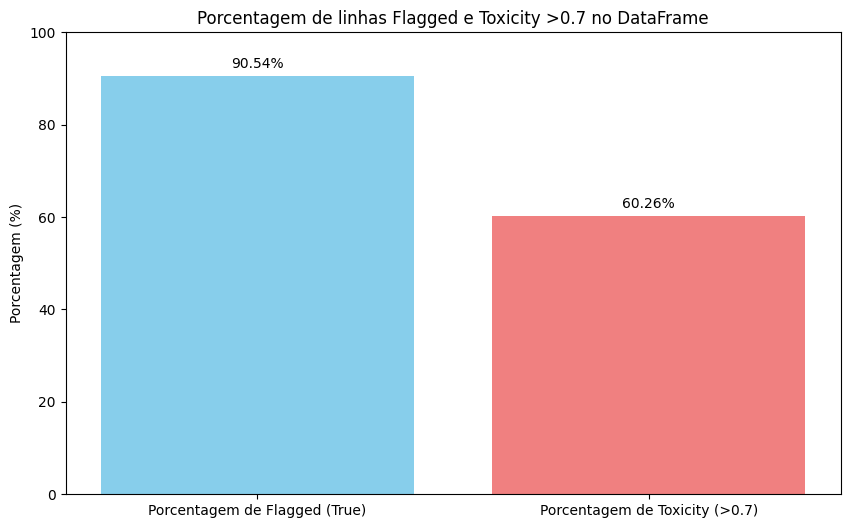

In [ ]:
# Calcula a porcentagem de 'flagged' == True
flagged_percentage = (df['flagged'] == True).mean() * 100

# Calcula a porcentagem de 'toxicity' == 0.7
toxicity_07_percentage = (df['TOXICITY'] >= 0.7).mean() * 100

# Cria os rótulos e valores para o gráfico de barras
labels = ['Porcentagem de Flagged (True)', 'Porcentagem de Toxicity (>0.7)']
percentages = [flagged_percentage, toxicity_07_percentage]

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(labels, percentages, color=['skyblue', 'lightcoral'])
plt.ylabel('Porcentagem (%)')
plt.title('Porcentagem de linhas Flagged e Toxicity >0.7 no DataFrame')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100

# Adiciona porcentagem no topo das barras
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')


plt.show()

## Definição API Perspective
**Toxicidade**:  
Um comentário grosseiro, desrespeitoso ou injustificável que provavelmente fará alguém abandonar uma discussão.


**Discussão**:
Pela definição mais geral da API Perspective, percebemos que a toxicidade engloba uma ampla gama de mensagens hostis. Entretanto, nem todas as mensagens presentes no data frame seriam consideradas tóxicas, partindo dos parâmetros estipulados pela API, que define valores acima de 0.7 como limiar. Nesse caso, a ferramenta de moderação apresenta uma quantidade maior de mensagens com flags, mas ainda é necessária a análise comparativa entre as flags identificadas e as demais métricas.

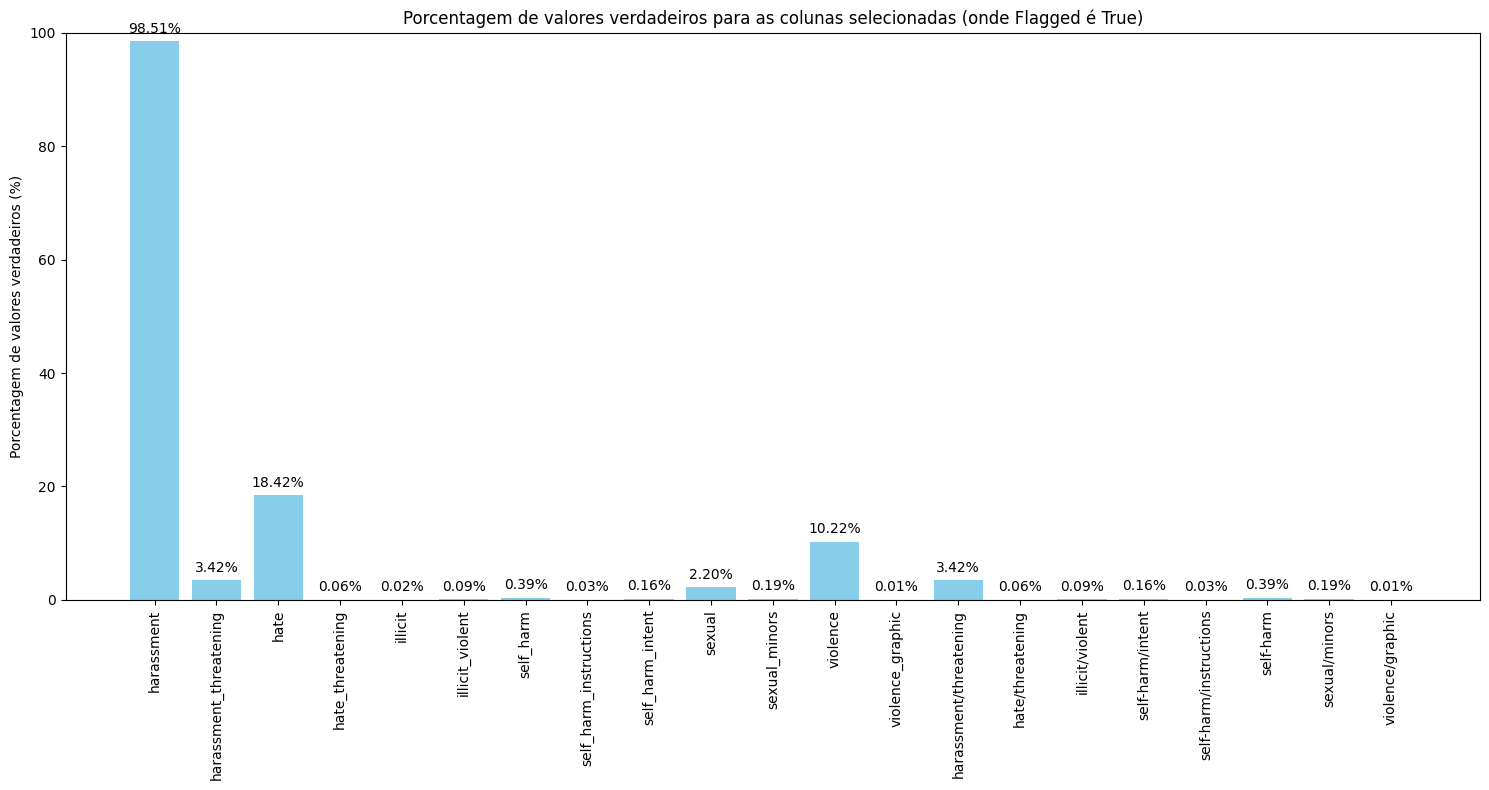

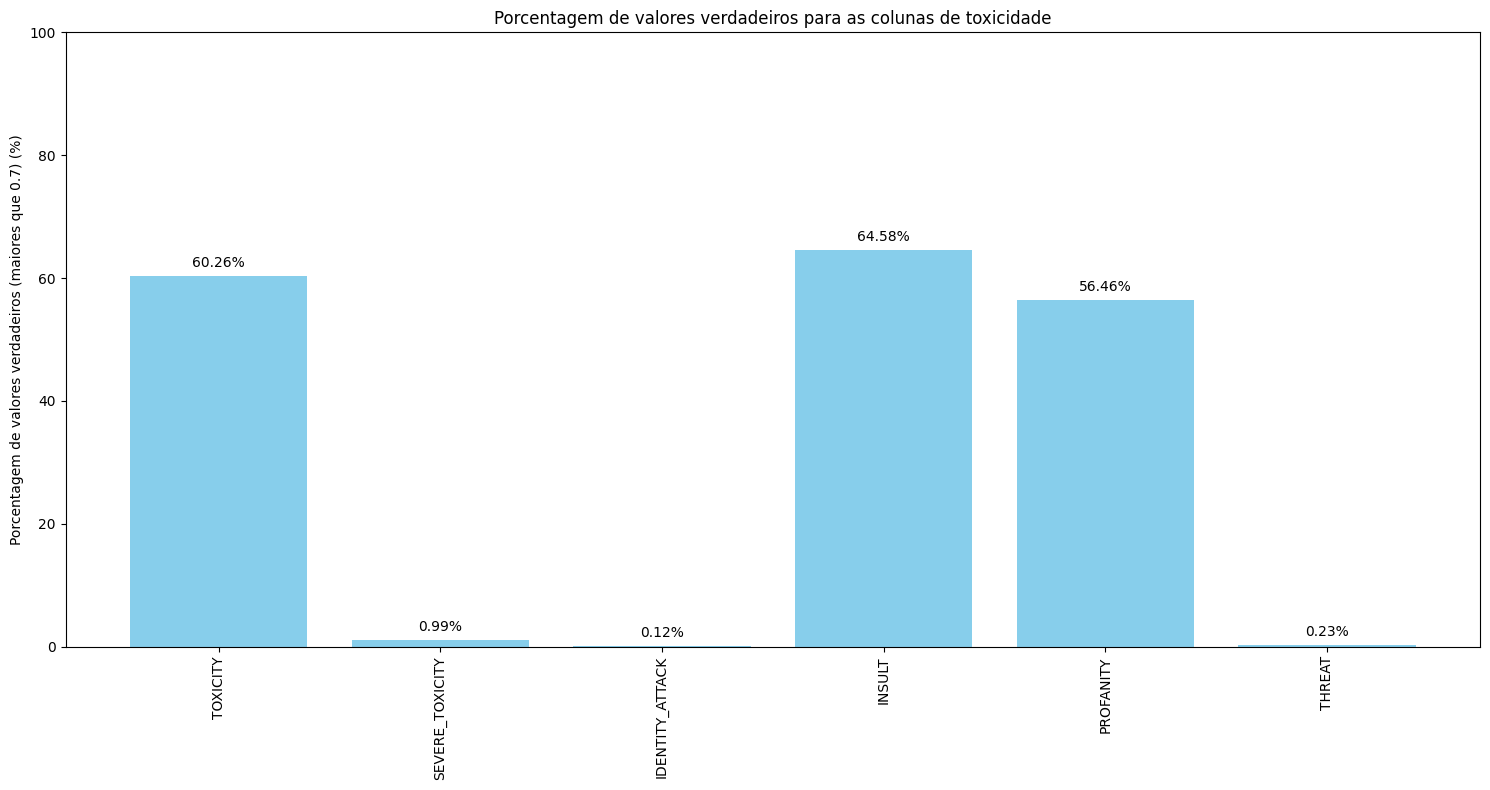

In [ ]:
df_flagged_true = df[df['flagged'] == True]

target_columns = [
    'harassment', 'harassment_threatening', 'hate',
    'hate_threatening', 'illicit', 'illicit_violent', 'self_harm',
    'self_harm_instructions', 'self_harm_intent', 'sexual', 'sexual_minors',
    'violence', 'violence_graphic', 'harassment/threatening',
    'hate/threatening', 'illicit/violent', 'self-harm/intent',
    'self-harm/instructions', 'self-harm', 'sexual/minors',
    'violence/graphic'
]

percentages = []
labels = []
for col in target_columns:
    if col in df_flagged_true.columns:
        percentage = (df_flagged_true[col] == True).mean() * 100
        percentages.append(percentage)
        labels.append(col)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

plt.figure(figsize=(15, 8))
plt.bar(labels, percentages, color='skyblue')
plt.ylabel('Porcentagem de valores verdadeiros (%)')
plt.title('Porcentagem de valores verdadeiros para as colunas selecionadas (onde Flagged é True)')
plt.ylim(0, 100)
plt.xticks(rotation=90)


for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('\n\n\n')

target_columns = [
    'TOXICITY', 'SEVERE_TOXICITY', 'IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'THREAT'
]

percentages = []
labels = []
for col in target_columns:
    if col in df.columns:
        percentage = (df[col] >= 0.7).mean() * 100
        percentages.append(percentage)
        labels.append(col)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")


plt.figure(figsize=(15, 8))
plt.bar(labels, percentages, color='skyblue')
plt.ylabel('Porcentagem de valores verdadeiros (maiores que 0.7) (%)')
plt.title('Porcentagem de valores verdadeiros para as colunas de toxicidade')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100
plt.xticks(rotation=90) # Rotate x-axis labels for better readability

# Add percentage values on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Conclusão

Com estes gráficos, podemos notar que a sensibilidade para as mensagens é maior. Além de nos trazer uma ideia mais geral sobre qual é o problema com a mensagem, vemos que, em muitos casos, na API Perspective, apenas um de seus componentes será detectado, de forma a nos alertar sobre uma potencial violação.

### Extração de categorias para uma mensagem.



In [ ]:
df_n = pd.read_csv('/content/drive/MyDrive/PLN_2025/csv/tox.csv')
date = df_n.loc[0, 'created_at']
user = df_n.loc[0, 'screen_name']
text = df_n.loc[0, 'full_text']

message = f'[{date}] {user}: {text}'

print(message)

[2020-10-26 21:25:00+00:00] raffaeljuri: @galloradical @Brunosoares1821 @solonsampaio @marciofrancasp @GuilhermeBoulos @freiredanilo09 Sou cirista e não apoio essa candidatura bosta do França, agora rasga o cu aí a vontade cacete


In [ ]:
result_mod = moderation_categories.invoke(message)

In [ ]:
result_mod

{'flagged': True,
 'categories': {'harassment': True,
  'harassment_threatening': False,
  'hate': False,
  'hate_threatening': False,
  'illicit': False,
  'illicit_violent': False,
  'self_harm': False,
  'self_harm_instructions': False,
  'self_harm_intent': False,
  'sexual': False,
  'sexual_minors': False,
  'violence': False,
  'violence_graphic': False,
  'harassment/threatening': False,
  'hate/threatening': False,
  'illicit/violent': False,
  'self-harm/intent': False,
  'self-harm/instructions': False,
  'self-harm': False,
  'sexual/minors': False,
  'violence/graphic': False}}

### Extração de informações na mensagem

In [ ]:
pront_moder_summary = ChatPromptTemplate.from_template('''
  Você irá agir como um moderador de um chat de rede social, o seu objetivo é atuar lendo mensagens enviadas e resumir o conteúdo
  delas para que posteriormente possa ser feita uma audição das razões pela qual a mensagem será bloqueada. Para isso você deve realizar
  uma análise produzindo a seguinte estrutura:

  Alvo da mensagem: (A quem a mensagem se refere, veja se alguma hashtag está presente ou algum arroba de usuário)
  Emoções da mensagem: (Agressivo, triste, ansioso, frustração, nojo ou ameaçador)
  Palavras chave: (Principais termos pejorativos usados na mensagem em palavras únicas)
  Usuário que enviou:
  Data e hora de envio: (Deixe em um formato mais legível)
  Mensagem: {message}
''')

chain_moder_summary = pront_moder_summary | model_analy | parser

summary_message = chain_moder_summary.invoke({
  'message': message,
})

display(Markdown(summary_message))

Alvo da mensagem: @galloradical, @Brunosoares1821, @solonsampaio, @marciofrancasp, @GuilhermeBoulos, @freiredanilo09

Emoções da mensagem: Agressivo, frustrado

Palavras chave: bosta, rasga, cu, cacete

Usuário que enviou: raffaeljuri

Data e hora de envio: 26 de outubro de 2020, 21:25 UTC

Mensagem: Sou cirista e não apoio essa candidatura bosta do França, agora rasga o cu aí a vontade cacete.

### Descrição de cada categoria em inglês

Esta descrição será traduzida e usada na cadeia produzida com o modelo, para análise da mensagem.

In [ ]:
categories_desc = {
'harassment':	'Content that expresses, incites, or promotes harassing language towards any target.',

'harassment/threatening':	'Harassment content that also includes violence or serious harm towards any target.',

'hate':	'Content that expresses, incites, or promotes hate based on race, gender, ethnicity, religion, nationality, sexual orientation, disability status, or caste. Hateful content aimed at non-protected groups (e.g., chess players) is harassment.',

'hate/threatening':	'Hateful content that also includes violence or serious harm towards the targeted group based on race, gender, ethnicity, religion, nationality, sexual orientation, disability status, or caste.',

'illicit':	'Content that gives advice or instruction on how to commit illicit acts. A phrase like "how to shoplift" would fit this category.',

'illicit/violent':	'The same types of content flagged by the illicit category, but also includes references to violence or procuring a weapon.',

'self-harm':	'Content that promotes, encourages, or depicts acts of self-harm, such as suicide, cutting, and eating disorders.',

'self-harm/intent':	'Content where the speaker expresses that they are engaging or intend to engage in acts of self-harm, such as suicide, cutting, and eating disorders.',

'self-harm/instructions':	'Content that encourages performing acts of self-harm, such as suicide, cutting, and eating disorders, or that gives instructions or advice on how to commit such acts.',

'sexual':	'Content meant to arouse sexual excitement, such as the description of sexual activity, or that promotes sexual services (excluding sex education and wellness).',

'sexual/minors':	'Sexual content that includes an individual who is under 18 years old.',

'violence':	'Content that depicts death, violence, or physical injury.',

'violence/graphic':	'Content that depicts death, violence, or physical injury in graphic detail.',
}

In [ ]:
categories_desc

{'harassment': 'Content that expresses, incites, or promotes harassing language towards any target.',
 'harassment/threatening': 'Harassment content that also includes violence or serious harm towards any target.',
 'hate': 'Content that expresses, incites, or promotes hate based on race, gender, ethnicity, religion, nationality, sexual orientation, disability status, or caste. Hateful content aimed at non-protected groups (e.g., chess players) is harassment.',
 'hate/threatening': 'Hateful content that also includes violence or serious harm towards the targeted group based on race, gender, ethnicity, religion, nationality, sexual orientation, disability status, or caste.',
 'illicit': 'Content that gives advice or instruction on how to commit illicit acts. A phrase like "how to shoplift" would fit this category.',
 'illicit/violent': 'The same types of content flagged by the illicit category, but also includes references to violence or procuring a weapon.',
 'self-harm': 'Content that

### Criação do Prompt para análise

In [ ]:
pront_moder_analysis = ChatPromptTemplate.from_template('''
  Você irá agir como um especialista moderador de um chat de rede social, uma mensagem potencialmente nociva será enviada para você, e seu
  objetivo é produzir um breve relatório de qual seria o motivo do bloqueio da mesma, produza um texto em português.

  Nesse relatório resuma a mensagem e diga explicitamente as infrações que foram encontradas. Para te auxiliar será enviada uma cópia da mensagem,
  um dicionário com as infrações detectadas, a definicição em inglês de cada infração, não manter o rótulo do termo no idioma original no
  relatório (que pode ser utilizada no corpo do relatório, mas deve ser traduzida) e
  um breve resumo com algumas informações sobre a mensagem. Use as palavra chave presentes no resumo.

  Em casos de mensagens com muitas infrações, recomendar o banimento do usuário. Caso contrário, recomendar o bloqueio da mensagem e advertência. Já nos
  casos de infrações leves não fazer nada, apenas notificar sobre o uso de termos impróprios. Em casos onde haja a detecção de self-harm/intent, recomendar
  atenção ao usuário e notificação a centros de ajuda psicológica.


  O relatório deve ser escrito como Markdown, nele você pegará os dados já processados e passados na seguinte estrutura:

  Alvo da mensagem:
  Emoções da mensagem:
  Palavras chave:
  Usuário que enviou:
  Data e hora de envio:
  Mensagem:


  Dicionário: {moderation_results}
  Descrição: {categories_desc} (esta em formato json)
  Dados: {summary_message}
  Conclusão: (Contendo a ação a ser feita com a mensagem)
''')

### Cadeia de análise

In [ ]:
chain_moder_analysis = pront_moder_analysis | model_analy | parser

analysis_message = chain_moder_analysis.invoke({
    'moderation_results': result_mod,
    'categories_desc': categories_desc,
    'summary_message': summary_message
})

display(Markdown(analysis_message))

# Relatório de Moderação

**Alvo da mensagem:** @galloradical, @Brunosoares1821, @solonsampaio, @marciofrancasp, @GuilhermeBoulos, @freiredanilo09  
**Emoções da mensagem:** Agressivo, frustrado  
**Palavras chave:** bosta, rasga, cu, cacete  
**Usuário que enviou:** raffaeljuri  
**Data e hora de envio:** 26 de outubro de 2020, 21:25 UTC  
**Mensagem:** Sou cirista e não apoio essa candidatura bosta do França, agora rasga o cu aí a vontade cacete.

## Resumo da Mensagem
A mensagem enviada pelo usuário expressa descontentamento em relação a uma candidatura política, utilizando linguagem ofensiva e agressiva. As palavras escolhidas demonstram um tom de hostilidade e desrespeito, direcionado a um grupo de pessoas.

## Infrações Detectadas
A mensagem contém conteúdo que expressa e incita linguagem de assédio, caracterizada pelo uso de termos depreciativos e agressivos. A utilização de palavras como "bosta", "rasga", "cu" e "cacete" contribui para um ambiente hostil e desrespeitoso, o que é considerado assédio.

## Ação Recomendada
Recomenda-se o bloqueio da mensagem e uma advertência ao usuário, uma vez que a infração detectada é grave, mas não justifica um banimento imediato. É importante monitorar o comportamento do usuário para evitar futuras infrações.